In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
import seaborn as sns

In [3]:
from sklearn import cross_validation
from sklearn import linear_model
from sklearn import metrics
from sklearn import tree
from sklearn import neighbors
from sklearn import svm
from sklearn import ensemble
from sklearn import cluster

In [4]:
from nltk.corpus import reuters

In [7]:
reuters.categories('training/9865')

[u'barley', u'corn', u'grain', u'wheat']

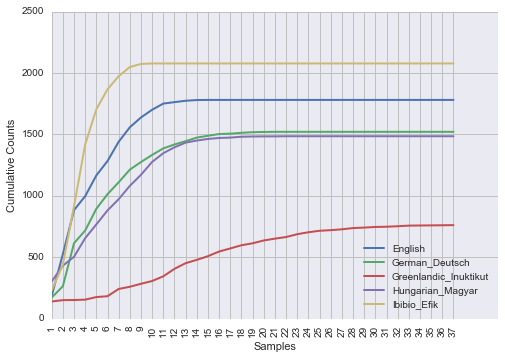

In [12]:
import nltk
from nltk.corpus import udhr # 有超过300种语言的世界人权宣言

languages = ['English','German_Deutsch','Greenlandic_Inuktikut','Hungarian_Magyar','Ibibio_Efik']
cfd = nltk.ConditionalFreqDist((lang, len(word)) 
                               for lang in languages
                               for word in udhr.words(lang + '-Latin1'))
cfd.plot(cumulative=True)

nltk 语料库文档 `help(nltk.corpus.reader)` 

In [ ]:
# 载入自己的语料库

from nltk.corpus import PlaintextCorpusReader
corpus_root = '/usr/share/dict'
wordlists = PlaintextCorpusReader(corpus_root, '.*')
wordlists.fileids() # list files
wordlists.words() # list words

In [16]:
# 条件频率分布: 配对序列(条件, 事件)

from nltk.corpus import brown
cfd = nltk.ConditionalFreqDist((genre, word)
                              for genre in ['news','science_fiction']
                              for word in brown.words(categories=genre))

In [14]:
brown.categories()

[u'adventure',
 u'belles_lettres',
 u'editorial',
 u'fiction',
 u'government',
 u'hobbies',
 u'humor',
 u'learned',
 u'lore',
 u'mystery',
 u'news',
 u'religion',
 u'reviews',
 u'romance',
 u'science_fiction']

In [18]:
len(cfd['news'])

14394

In [19]:
len(cfd['science_fiction'])

3233

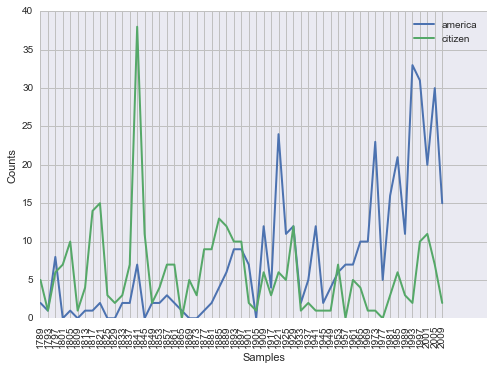

In [20]:
# 绘制分布图表

from nltk.corpus import inaugural # 就职演讲语料
cfd = nltk.ConditionalFreqDist((target, fileid[:4])
                              for fileid in inaugural.fileids()
                              for w in inaugural.words(fileid)
                              for target in ['america','citizen']
                              if w.lower().startswith(target))
cfd.plot()

In [21]:
# 双连词 bigrams 生成随机文本

def generate_model(cfdist, word, num=15):
    for i in range(num):
        print word,
        word = cfdist[word].max()

text = nltk.corpus.genesis.words('english-kjv.txt')
bigrams = nltk.bigrams(text)
cfd = nltk.ConditionalFreqDist(bigrams)

In [23]:
cfd['living']

FreqDist({u',': 1,
          u'.': 1,
          u'creature': 7,
          u'soul': 1,
          u'substance': 2,
          u'thing': 4})

In [24]:
generate_model(cfd, 'living')

living creature that he said , and the land of the land of the land


In [27]:
# 过滤文本 仅保留罕见的或拼写错误的词汇

def unusual_words(text):
    text_vocab = set(w.lower() for w in text if w.isalpha())
    english_vocab = set(w.lower() for w in nltk.corpus.words.words())
    unusual = text_vocab.difference(english_vocab)
    return sorted(unusual)

unusual_words(nltk.corpus.gutenberg.words('austen-sense.txt'))[:20]

[u'abbeyland',
 u'abhorred',
 u'abilities',
 u'abounded',
 u'abridgement',
 u'abused',
 u'abuses',
 u'accents',
 u'accepting',
 u'accommodations',
 u'accompanied',
 u'accounted',
 u'accounts',
 u'accustomary',
 u'aches',
 u'acknowledging',
 u'acknowledgment',
 u'acknowledgments',
 u'acquaintances',
 u'acquiesced']

In [28]:
unusual_words(nltk.corpus.nps_chat.words())[20:30]

[u'affects',
 u'afk',
 u'agaibn',
 u'ages',
 u'aggravated',
 u'agurlwithbigguns',
 u'ahah',
 u'ahahah',
 u'ahahh',
 u'ahahha']

In [33]:
# stopwords 无内容的高频词汇

from nltk.corpus import stopwords
len(stopwords.words('english'))

153

In [36]:
# puzzle letters
# 要求包含 r 且4个字母以上

puzzle_letters = nltk.FreqDist('egivrvonl')
obligatory = 'r'
wordlist = nltk.corpus.words.words()
[w for w in wordlist if len(w) >= 4 and obligatory in w and nltk.FreqDist(w) <= puzzle_letters]

[u'enrol',
 u'ergon',
 u'genro',
 u'girl',
 u'girn',
 u'giro',
 u'giver',
 u'glor',
 u'glore',
 u'glover',
 u'goer',
 u'goner',
 u'gore',
 u'gorlin',
 u'govern',
 u'grein',
 u'grin',
 u'groin',
 u'grove',
 u'grovel',
 u'ignore',
 u'inro',
 u'involver',
 u'iron',
 u'irone',
 u'levir',
 u'lienor',
 u'lier',
 u'liner',
 u'linger',
 u'lire',
 u'liver',
 u'livor',
 u'livre',
 u'loir',
 u'longer',
 u'lore',
 u'lori',
 u'lorn',
 u'lover',
 u'lovering',
 u'negro',
 u'nigre',
 u'noiler',
 u'noir',
 u'nori',
 u'norie',
 u'ogler',
 u'ogre',
 u'oiler',
 u'oner',
 u'oriel',
 u'orle',
 u'over',
 u'overling',
 u'regin',
 u'region',
 u'reign',
 u'rein',
 u'renvoi',
 u'reoil',
 u'revolving',
 u'rigol',
 u'rile',
 u'rine',
 u'ring',
 u'ringe',
 u'ringle',
 u'rive',
 u'rivel',
 u'riven',
 u'roil',
 u'role',
 u'rone',
 u'rove',
 u'roving',
 u'vergi',
 u'veri',
 u'vier',
 u'vigor',
 u'viner',
 u'violer',
 u'vire',
 u'vireo',
 u'virl',
 u'virole',
 u'viron',
 u'viver',
 u'girl',
 u'iron',
 u'over',
 u'ring'

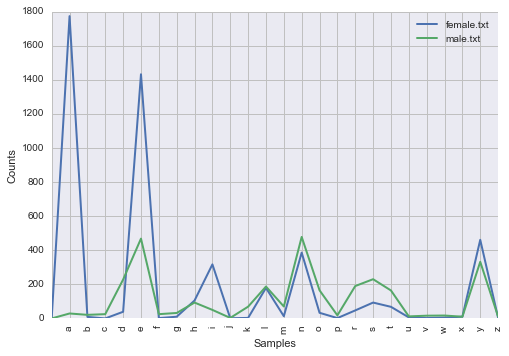

In [37]:
# 名字语料

names = nltk.corpus.names
male_names = names.words('male.txt')
female_names = names.words('female.txt')

cfd = nltk.ConditionalFreqDist((fileid, name[-1])
                              for fileid in names.fileids()
                              for name in names.words(fileid))
cfd.plot()

In [38]:
# WordNet

from nltk.corpus import wordnet as wn

wn.synsets('motorcar') # 同义词集

[Synset('car.n.01')]

In [43]:
wn.synset('car.n.01').lemma_names # ?

<bound method Synset.lemma_names of Synset('car.n.01')>

In [50]:
for synset in wn.synsets('car'):
    print synset.lemma_names

<bound method Synset.lemma_names of Synset('car.n.01')>
<bound method Synset.lemma_names of Synset('car.n.02')>
<bound method Synset.lemma_names of Synset('car.n.03')>
<bound method Synset.lemma_names of Synset('car.n.04')>
<bound method Synset.lemma_names of Synset('cable_car.n.01')>
